In [1]:
# load libraries and scripts
include("../scripts/tools.jl")
include("../scripts/plotting.jl")
include("../scripts/get_grid.jl")
include("../scripts/get_params.jl")
include("../scripts/stable.jl")
include("../scripts/dynamics.jl")
include("../scripts/disturbances.jl");

In [2]:
#load borders
border, scale_factor = import_border("../data/borders/border.json")

dx = 0.01
Nx, Ny, coord, isinside, isborder, isgrid, n = get_grid(border, dx);

In [13]:
# compute or load grid parameters
minv, gamma, p, xi, bx, by, m, d = get_params_diff_fast(isinside, isgrid, n, Ny, Nx, Float64(dx), coord,
    scale_factor, "../data/disc/pantagruel.h5",
    "../numerics/grid_params_" * string(dx) * ".h5",
    Niter=30, dmax = 0.01, patch=20.0, bmin=50.0, tau=0.00001);

  0.693289 seconds (499.68 k allocations: 4.525 GiB, 10.20% gc time)
  0.659785 seconds (9.65 k allocations: 706.206 MiB, 2.79% gc time)


In [15]:
th0 = compute_stable_sol(isinside, n, bx, by, p, interval = 1000, Niter = 40000, tol = 1e-7);

[1000.0 0.0005210860675660955]
[2000.0 0.00040224769843555386]
[3000.0 0.00026644178937751395]
[4000.0 0.0001755335086321974]
[5000.0 0.00011703557098829975]
[6000.0 7.942186160958542e-5]
[7000.0 5.514296765118942e-5]
[8000.0 4.2006628795165923e-5]
[9000.0 3.6866854849826325e-5]
[10000.0 3.262840350115592e-5]
[11000.0 2.9098992754161834e-5]
[12000.0 2.6142320997069035e-5]
[13000.0 2.3656952813033705e-5]
[14000.0 2.156413273524116e-5]
[15000.0 1.9800668382807807e-5]
[16000.0 1.831466505830548e-5]
[17000.0 1.706286096403442e-5]
[18000.0 1.600886707298077e-5]
[19000.0 1.5121928169770094e-5]
[20000.0 1.4375995048943047e-5]
[21000.0 1.3748992884754507e-5]
[22000.0 1.3222222279174467e-5]
[23000.0 1.2779856996103511e-5]
[24000.0 1.2408517034101507e-5]
[25000.0 1.2096903346359156e-5]
[26000.0 1.1835484640565497e-5]
[27000.0 1.1616228916433435e-5]
[28000.0 1.1432373731024015e-5]
[29000.0 1.1278230034328374e-5]
[30000.0 1.1149015064049195e-5]
[31000.0 1.1040710327758774e-5]
[32000.0 1.0949941148

In [17]:
#heatmap(reshape(th0,Ny,Nx))
#println(size(p))

In [18]:
# add a disturbance
dp = local_disturbance(coord[isgrid,:], [-0.2; -0.5], -10.0, 0.1, dx)

3854-element Vector{Float64}:
  -73.45962966666494
  -81.99728550924469
  -90.61649742486254
  -99.1452980588562
 -107.39746467548902
 -115.17891701686867
 -122.29508619449571
 -128.55887976460667
 -133.79879634927198
  -71.88825754546312
  -81.04974313812413
  -90.46954032717532
  -99.9793202564212
    ⋮
   -2.5610556565341055e-15
   -2.271339358823107e-15
   -1.994353280264444e-15
   -1.7337210100888345e-15
   -1.492153107764751e-15
   -1.271465611305491e-15
   -1.060506494750185e-15
   -9.405379909132663e-16
   -8.258409383453448e-16
   -7.17915827636598e-16
   -6.178850732544079e-16
   -5.26500677640791e-16

In [19]:
ts, thetas, omegas = perform_dyn_sim(isgrid, xi, p+dp, minv, gamma, th0, interval=10, Ndt=5000, dt=0.01, method="crank-nicolson")

Total time: 50.0
NIter: 10 Avg. Omega: -0.013064106055435468
NIter: 20 Avg. Omega: -0.020532490544620773
NIter: 30 Avg. Omega: -0.027377024221660946
NIter: 40 Avg. Omega: -0.03551019264503321
NIter: 50 Avg. Omega: -0.045093175082588706
NIter: 60 Avg. Omega: -0.054055168692723615
NIter: 70 Avg. Omega: -0.05906731503202668
NIter: 80 Avg. Omega: -0.06431208923674628
NIter: 90 Avg. Omega: -0.06988362927902529
NIter: 100 Avg. Omega: -0.07395652993105092
NIter: 110 Avg. Omega: -0.07733191929146253
NIter: 120 Avg. Omega: -0.07998544269548358
NIter: 130 Avg. Omega: -0.08176493719225279
NIter: 140 Avg. Omega: -0.08341097605405623
NIter: 150 Avg. Omega: -0.08329927617920353
NIter: 160 Avg. Omega: -0.08315316782246225
NIter: 170 Avg. Omega: -0.08335090420089047
NIter: 180 Avg. Omega: -0.08361451914811852
NIter: 190 Avg. Omega: -0.08324469074003044
NIter: 200 Avg. Omega: -0.08173124222741131
NIter: 210 Avg. Omega: -0.08000927436633573
NIter: 220 Avg. Omega: -0.07964766519661412
NIter: 230 Avg. Ome

NIter: 1870 Avg. Omega: -0.16731926374435277
NIter: 1880 Avg. Omega: -0.16722681404946743
NIter: 1890 Avg. Omega: -0.1670617016927507
NIter: 1900 Avg. Omega: -0.16692771965530626
NIter: 1910 Avg. Omega: -0.16687104238233805
NIter: 1920 Avg. Omega: -0.1668949414758399
NIter: 1930 Avg. Omega: -0.16690931220462568
NIter: 1940 Avg. Omega: -0.1668867242455147
NIter: 1950 Avg. Omega: -0.16688744904929947
NIter: 1960 Avg. Omega: -0.166985346298076
NIter: 1970 Avg. Omega: -0.1671119727655986
NIter: 1980 Avg. Omega: -0.16723045351271518
NIter: 1990 Avg. Omega: -0.16732099447705792
NIter: 2000 Avg. Omega: -0.16748671364303028
NIter: 2010 Avg. Omega: -0.16767319565120872
NIter: 2020 Avg. Omega: -0.16779871006788027
NIter: 2030 Avg. Omega: -0.16792968895520322
NIter: 2040 Avg. Omega: -0.16808708193840557
NIter: 2050 Avg. Omega: -0.16826832187492324
NIter: 2060 Avg. Omega: -0.16840046127886119
NIter: 2070 Avg. Omega: -0.1684588384436285
NIter: 2080 Avg. Omega: -0.1685405070077042
NIter: 2090 Avg. O

NIter: 3720 Avg. Omega: -0.1683290458601021
NIter: 3730 Avg. Omega: -0.16833284584789512
NIter: 3740 Avg. Omega: -0.16833622411844576
NIter: 3750 Avg. Omega: -0.1683361441183916
NIter: 3760 Avg. Omega: -0.16833285499218215
NIter: 3770 Avg. Omega: -0.1683313240240972
NIter: 3780 Avg. Omega: -0.1683302822065913
NIter: 3790 Avg. Omega: -0.16832748389813856
NIter: 3800 Avg. Omega: -0.16832210341057768
NIter: 3810 Avg. Omega: -0.1683156660675505
NIter: 3820 Avg. Omega: -0.1683106596703605
NIter: 3830 Avg. Omega: -0.16830719549215917
NIter: 3840 Avg. Omega: -0.16830122473501027
NIter: 3850 Avg. Omega: -0.16829399842141213
NIter: 3860 Avg. Omega: -0.16828687803915016
NIter: 3870 Avg. Omega: -0.1682802250334745
NIter: 3880 Avg. Omega: -0.1682749817642898
NIter: 3890 Avg. Omega: -0.16826840120349637
NIter: 3900 Avg. Omega: -0.16826312432880058
NIter: 3910 Avg. Omega: -0.16825991536576365
NIter: 3920 Avg. Omega: -0.16825666722507826
NIter: 3930 Avg. Omega: -0.16825379272569133
NIter: 3940 Avg. O

([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9  …  49.1, 49.2, 49.300000000000004, 49.4, 49.5, 49.6, 49.7, 49.800000000000004, 49.9, 50.0], [-0.7803537269214941 -0.78238383063965 … -9.003393791922724 -9.020220903960473; -0.7668546021907411 -0.7687555393350193 … -8.989923248509685 -9.006750411555418; … ; 0.1976720332012241 0.19767072082344167 … -7.601219248434328 -7.618051763003682; 0.19843951542934996 0.198450724768052 … -7.600491476349993 -7.617323921407055], [0.0 -0.039582711762745124 … -0.16826220536685282 -0.16827831072747176; 0.0 -0.039229024075759344 … -0.16826419513903204 -0.16827953962179268; … ; 0.0 -0.00015432586920761324 … -0.16833293050136203 -0.16832398897907622; 0.0 0.00020820035785312026 … -0.16832244233036744 -0.16832321537323172])

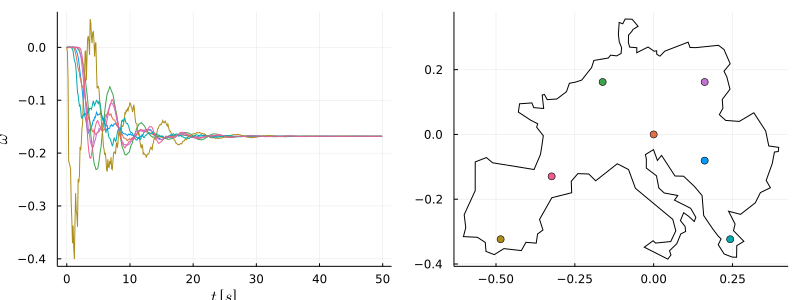

In [20]:
c = [500 -250; 0.0 0.0; -500 500; 500. 500.; -1500.0 -1000.0; 750.0 -1000; -1000 -400] / scale_factor
time_plot(ts, omegas, coord[isgrid,:], c, tstart = 0.0, tend = 50.0, borders = [border])

In [23]:
(sum(dp)/sum(d)+0.168294674687655) / 0.168294674687655

4.0646252786754796e-5

In [ ]:
hm_movie(isgrid, Ny, Nx, ts, omegas, tstart=0.0, tend=20.0, interval = 1)

LoadError: UndefVarError: ginput not defined